In [ ]:
import sys
!{sys.executable} -m pip install mycolorpy

In [1]:
from models import Entity, Environment
from vizuals import plot_env_history

import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
import time

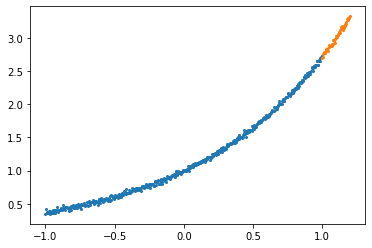

In [2]:
x_arr = torch.linspace(-1, 1, 500)
y_arr = torch.exp(x_arr) + torch.normal(0, 0.02, size=(500,))
dataset = Data.TensorDataset(x_arr.unsqueeze(1),y_arr.unsqueeze(1))
train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

x_val = torch.linspace(1, 1.2, 50)
y_val = torch.exp(x_val) + torch.normal(0, 0.02, size=(50,))
dataset = Data.TensorDataset(x_val.unsqueeze(1), y_val.unsqueeze(1))
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2)
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2)

In [3]:
env = Environment(5, train_loader, train_epochs=50, validation_loader=val_loader)

cpu


In [4]:
start_time = time.time()
env.train_epoch()
print(f"Train ended in {int(time.time() - start_time)} s")
env.validate_entities()

Train ended in 17 s


[0.32054738283157347,
 0.03651430517435074,
 0.07828279733657836,
 0.12785980701446534,
 0.6854161071777344]

5 ['#0000ff', '#0040df', '#0080bf', '#00c09f', '#00ff80']
[1] [0.32054738283157347] 0
[1] [0.03651430517435074] 1
[1] [0.07828279733657836] 2
[1] [0.12785980701446534] 3
[1] [0.6854161071777344] 4


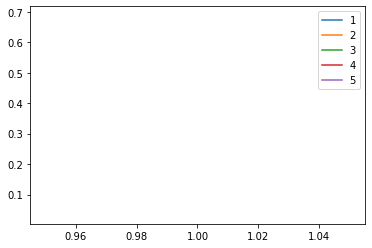

In [5]:
plot_env_history(env)

In [6]:
for i in range(5):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities()
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

Evo epoch 1 ended in 13 s
Evo epoch 2 ended in 11 s
Evo epoch 3 ended in 10 s
Evo epoch 4 ended in 10 s
Evo epoch 5 ended in 12 s


5 ['#0000ff', '#0040df', '#0080bf', '#00c09f', '#00ff80']
[1, 2, 3, 4, 5, 6] [0.07828279733657836, 0.08052570164203644, 0.053958421647548674, 0.048575985431671145, 0.05403895884752273, 0.3548190689086914] 2
[1, 2, 3, 4, 5, 6] [0.07828279733657836, 0.08052570164203644, 0.07219803631305695, 0.07141022682189942, 0.07111339151859283, 0.6015176630020141] 2
[1, 2, 3, 4, 5, 6] [0.07828279733657836, 0.08052570164203644, 0.053958421647548674, 0.048575985431671145, 0.07494765400886536, 0.6015176486968994] 2
[1, 2, 3, 4, 5, 6] [0.07828279733657836, 0.08052570164203644, 0.053958421647548674, 0.048575985431671145, 0.05403895884752273, 0.3190606164932251] 2
[1, 2, 3, 4, 5, 6] [0.07828279733657836, 0.08052570164203644, 0.07219803631305695, 0.07141022682189942, 0.07111339151859283, 0.3511170840263367] 2


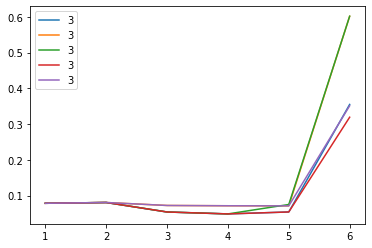

In [7]:
plot_env_history(env)

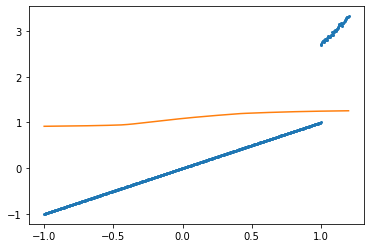

In [9]:
plt.plot(torch.cat((x_arr, x_val)), torch.cat((x_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[4].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Model")